# Exploratory Data Analysis (EDA) --- Demographics 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Data Cleaning

In [3]:
file1 = './data/data_raw/POP1990.csv'
file2 = './data/data_raw/POP2000.csv'
file3 = './data/data_raw/est_POP2010_2015.csv'
df_1990 = pd.read_csv(file1, usecols=['year', 'stname', 'tot_pop'])
df_2000 = pd.read_csv(file2, usecols=['year', 'stname', 'tot_pop'])
#df_2010_est = pd.read_csv(file3, encoding = "ISO-8859-1")

In [13]:
df_1990.head(15)

,year,stname,tot_pop
0,1990,Alabama,34353
1,1991,Alabama,35010
2,1992,Alabama,35985
3,1993,Alabama,36953
4,1994,Alabama,38186
5,1995,Alabama,39112
6,1996,Alabama,40207
7,1996,Alabama,40207
8,1997,Alabama,41238
9,1998,Alabama,42106


## Clean up pop_1990 and pop_2000 data 

In [14]:
df_1990 = df_1990.groupby(['stname', 'year']).sum().reset_index()
df_2000 = df_2000.groupby(['stname', 'year']).sum().reset_index()

In [15]:
df_1990.head()

,stname,year,tot_pop
0,Alabama,1990,4152384
1,Alabama,1991,4877290
2,Alabama,1992,4517525
3,Alabama,1993,4449453
4,Alabama,1994,4665300


In [16]:
df_2000.head()

,stname,year,tot_pop
0,Alabama,2000,4452173
1,Alabama,2001,4467634
2,Alabama,2002,4480089
3,Alabama,2003,4503491
4,Alabama,2004,4530729


## Clean 2010_est data

In [112]:
df_2010_est = pd.read_csv(file3, encoding = "ISO-8859-1", usecols=['STNAME','CTYNAME', 'POPESTIMATE2011', 
                                                                  'POPESTIMATE2012', 'POPESTIMATE2013',
                                                                  'POPESTIMATE2014', 'POPESTIMATE2015' ])
colnames = ['stname', 'ctyname', '2011', '2012', '2013', '2014', '2015']

In [113]:
df_2010_est.columns = colnames

In [114]:
df_2010_est.head()

,stname,ctyname,2011,2012,2013,2014,2015
0,Alabama,Alabama,4801108,4816089,4830533,4846411,4858979
1,Alabama,Autauga County,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,186659,190396,195126,199713,203709
3,Alabama,Barbour County,27226,27159,26973,26815,26489
4,Alabama,Bibb County,22733,22642,22512,22549,22583


In [115]:
df_2010_est = df_2010_est[df_2010_est.stname == df_2010_est.ctyname].drop('ctyname', axis = 1).reindex()

In [116]:
df_2010_est.head()

,stname,2011,2012,2013,2014,2015
0,Alabama,4801108,4816089,4830533,4846411,4858979
68,Alaska,722720,731228,737442,737046,738432
98,Arizona,6468732,6553262,6630799,6728783,6828065
114,Arkansas,2938538,2949499,2957957,2966835,2978204
190,California,37700034,38056055,38414128,38792291,39144818


In [117]:
df_2010_est.head()

,stname,2011,2012,2013,2014,2015
0,Alabama,4801108,4816089,4830533,4846411,4858979
68,Alaska,722720,731228,737442,737046,738432
98,Arizona,6468732,6553262,6630799,6728783,6828065
114,Arkansas,2938538,2949499,2957957,2966835,2978204
190,California,37700034,38056055,38414128,38792291,39144818


In [118]:
df_2010_est = df_2010_est.melt(id_vars='stname', value_vars=['2011', '2012', '2013', '2014', '2015'],
                               var_name='year', value_name='tot_pop')
df_2010_est.head()

,stname,year,tot_pop
0,Alabama,2011,4801108
1,Alaska,2011,722720
2,Arizona,2011,6468732
3,Arkansas,2011,2938538
4,California,2011,37700034


In [119]:
df_2010_est = df_2010_est.groupby(['stname', 'year']).sum().reset_index()
df_2010_est.head()

,stname,year,tot_pop
0,Alabama,2011,4801108
1,Alabama,2012,4816089
2,Alabama,2013,4830533
3,Alabama,2014,4846411
4,Alabama,2015,4858979


## Combine data to one dataframe

In [120]:
df_pop = pd.concat([df_1990, df_2000, df_2010_est], axis = 0).sort_values(['stname', 'year'])
df_pop.year = df_pop.year.astype(int)

In [121]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 254
Data columns (total 3 columns):
stname     1326 non-null object
year       1326 non-null int64
tot_pop    1326 non-null int64
dtypes: int64(2), object(1)
memory usage: 41.4+ KB


In [122]:
df_pop.head(30)

,stname,year,tot_pop
0,Alabama,1990,4152384
1,Alabama,1991,4877290
2,Alabama,1992,4517525
3,Alabama,1993,4449453
4,Alabama,1994,4665300
5,Alabama,1995,4986229
6,Alabama,1996,5101961
7,Alabama,1997,4955683
8,Alabama,1998,4490646
9,Alabama,1999,4685143


# Data Exploration

In [123]:
len(df_pop.stname.unique())

51

In [124]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 254
Data columns (total 3 columns):
stname     1326 non-null object
year       1326 non-null int64
tot_pop    1326 non-null int64
dtypes: int64(2), object(1)
memory usage: 41.4+ KB


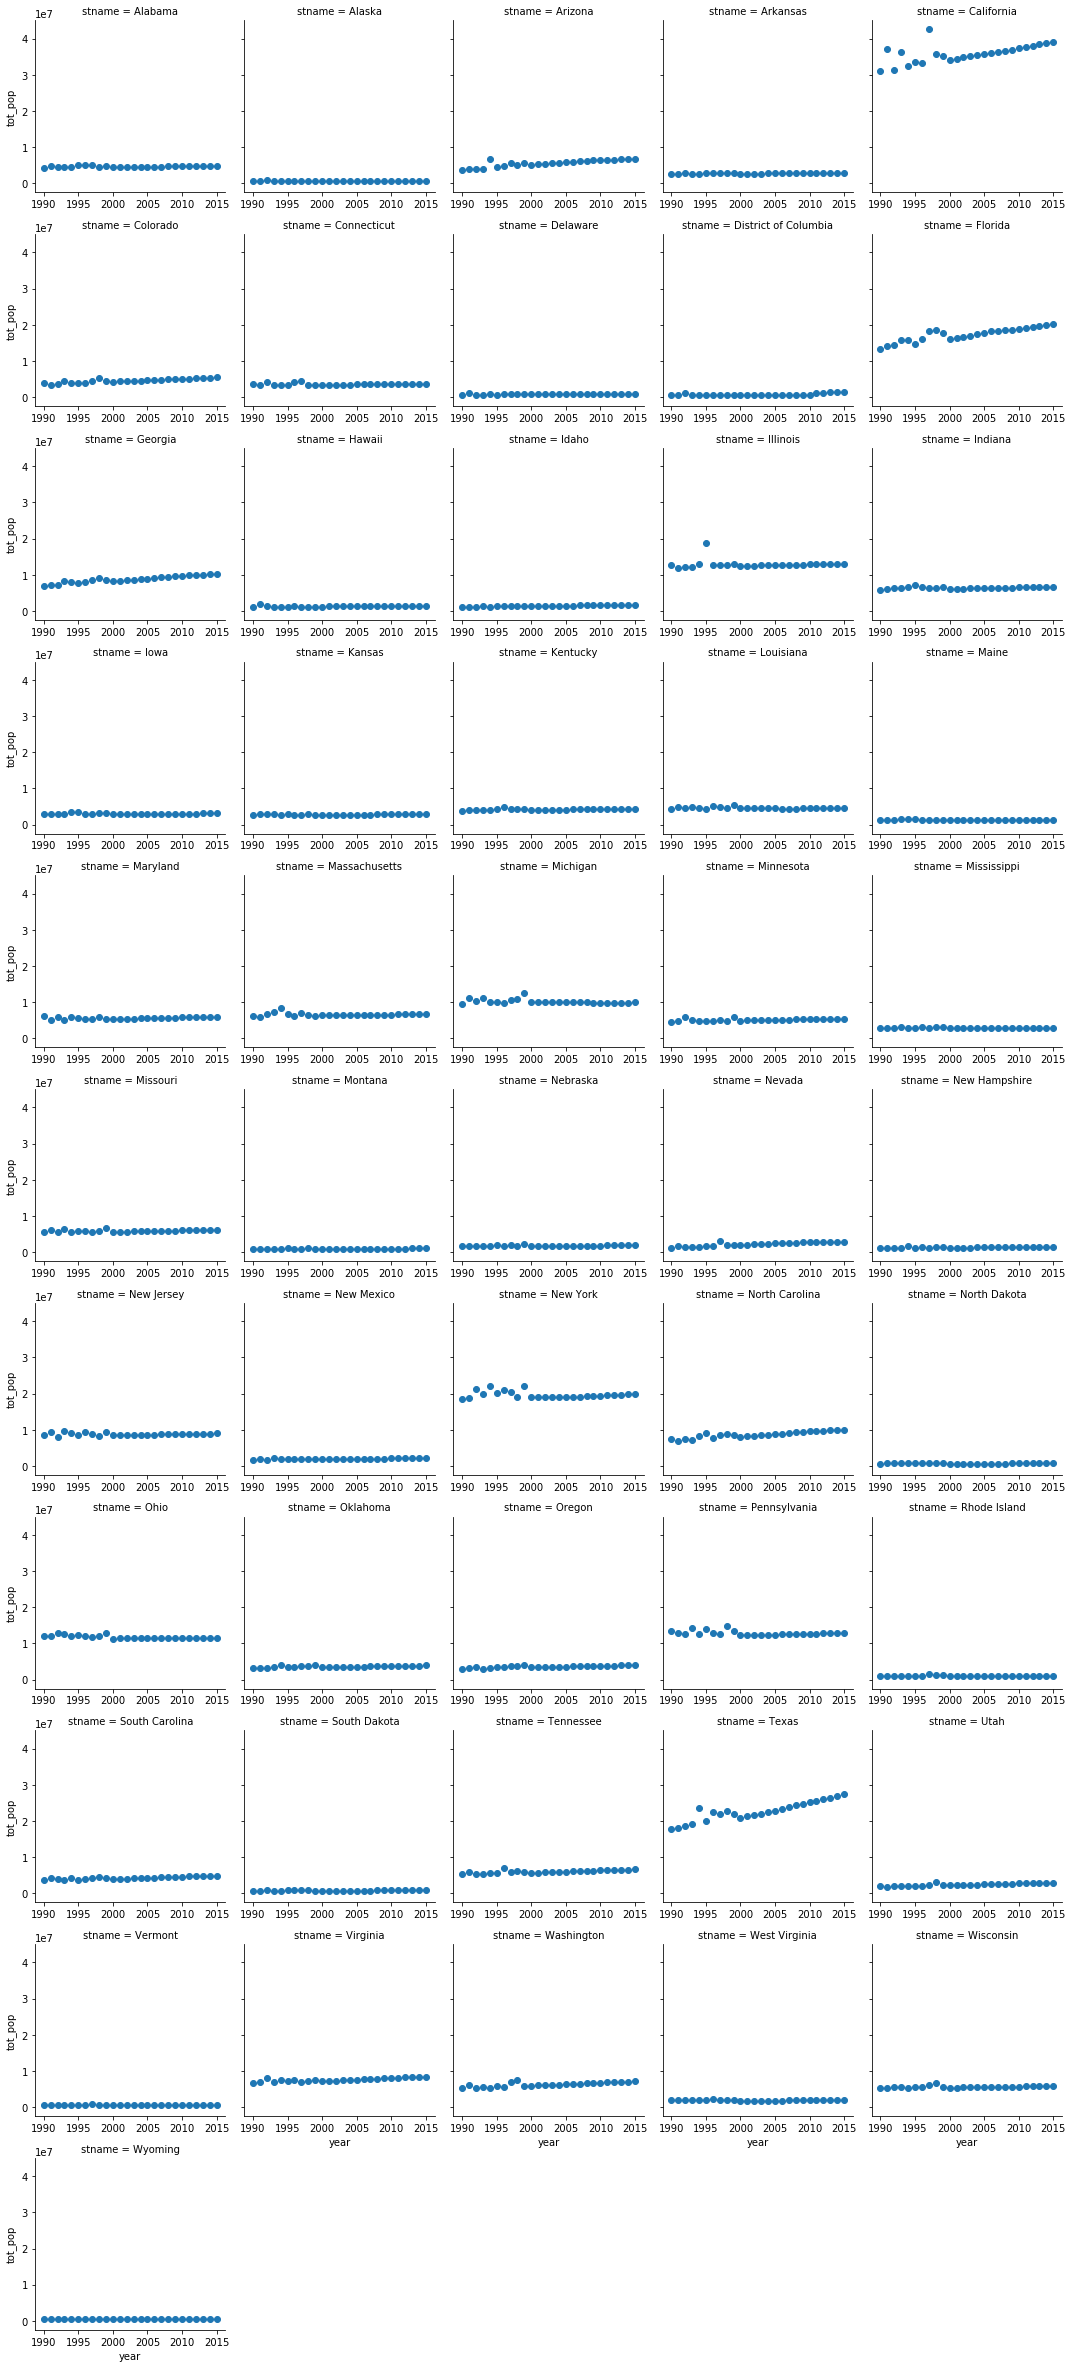

In [148]:
g = sns.FacetGrid(data = df_pop, col = 'stname',col_wrap=5, sharex = False)
g.map(plt.scatter,  'year', 'tot_pop')

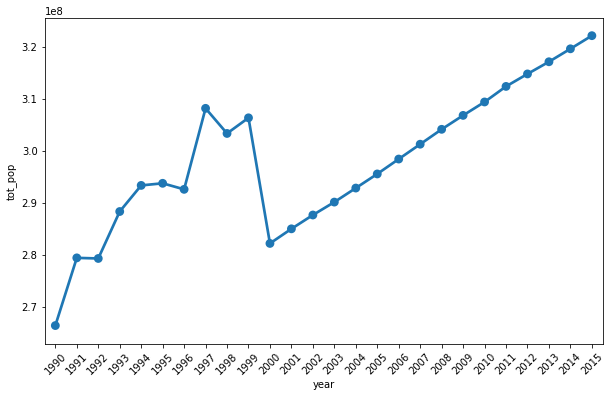

In [159]:
plt.figure(figsize = (10, 6))
sns.pointplot(data =df_pop.groupby('year').sum().reset_index(), x = 'year', y = 'tot_pop')
_ = plt.xticks(rotation = 45)

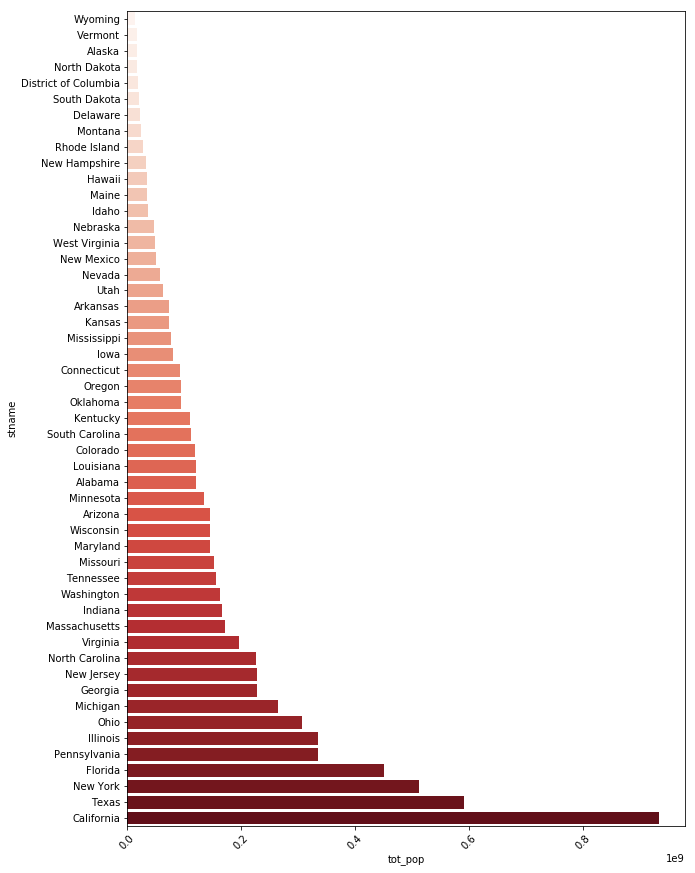

In [214]:
plt.figure(figsize = (10, 15))
sns.barplot(data =df_pop.groupby('stname').sum().reset_index().sort_values('tot_pop'), y = 'stname', x= 'tot_pop', hue_order='tot_pop',palette='Reds')
_ = plt.xticks(rotation = 45)